# Метод Эйлера для численного решения ОДУ

Рассмотрим задачу Коши:
\begin{equation*}
 \begin{cases}
   y' = f(x, y), \\
   y(x_0) = y_0
 \end{cases}.
\end{equation*}
Будем считать, что $f \in C^{\infty}$. Необходимо найти решение на $[x_0, x_0+X]$.

Теперь продифференцируем $y':y^{''}=f'_x(x, y)+f'_y(x, y)y'.$

Затем продифференцируем $y'':y^{'''}=f''_{xx}(x, y)+2f''_{xy}(x, y)y'+f''_{yy}(x, y)(y')^2+f'_{y}(x, y)y''.$

Аналогично мы можем найти производные сколь угодно большого порядка.


$$y(x) \approx \sum \limits_{k=0}^n \frac{y^{(k)}(x_0)}{k!}(x-x_0)^k.$$

Как мы помним, у степенного ряда есть радиус сходимости и может оказаться так, что радиус сходимости данного ряда будет меньше, чем $X$, тогда, погрешность, которую даёт
нам ряд Тейлора, при увеличении $n$ не будет стремиться к нулю. Чтобы избежать этого, давайте разобьём исходный отрезок $[x_0, x_0+X]$ на подотрезки $[x_0, x_1], [x_1, x_2], \dots, [x_{N-1}, x_N]$. Предположим, что мы нашли некоторым образом $y_i -$ приближение для $y(x_i)$ (ясно, что $y_0 = y(x_0)$). Тогда можно найти приближения для производных функции $y$ в точке $x_i$ сколь угодно большого порядка $- \> y'_i, y''_i, \dots$

$$y(x) \approx z_i(x) \sum \limits_{k=0}^n \frac{y^{(k)}_i}{k!}(x-x_i)^k.$$

Тогда приближение для $y(x_{i+1})$ найдём по формуле $y_{i+1} = z_i(x_{i+1}).$

Основная проблема этого метода заключается в том, что если мы говорим, что $n$ достаточно большое число, то нам потребуется хранить в памяти порядка $n^2$ производных функции $f$, либо каждый раз их считать, что не оптимально либо по времени, либо по памяти.

Леонард Эйлер исследовал в своей данный метод в ситуации $n = 1$ и $x_i - x_{i-1} = h = const$.

Мы получили $y_{i + 1} = y_{i} + h \cdot f(x_{i}, y_{i})$.
Если бы значение $y_{i}$ в точности совпадало с $y(x_{i})$, то при подсчёте $y_{i + 1}$
мы ошибаемся на $O(h^2)$, так как тогда $y_{i + 1}$ отличается от $y(x_{i})$ на $O(h^2)$. Поэтому
можно считать, что на каждом шаге мы ошибаемся на $O(h^2)$. Следовательно, общая
погрешность на  $\frac{1}{h}$ отрезках будет равна $O(h)$, что, как мы с вами понимаем, многовато.
Теперь давайте попробуем улучшить точность, но при этом не израсходовать дополнительную память.

In [1]:
from matplotlib import pyplot as plt
from math import sin, cos, exp, tan
import numpy as np

In [2]:
def trasform(x):
    if x > 100:
        return 100
    if x < -100:
        return -100
    return x

In [3]:
def Euler_basic(function, x0, y0, n, step, flag=False):    
    Ox = [x0]
    Oy = [y0]
    
    for i in range(0, n):
        last_x = Ox[-1]
        last_y = Oy[-1]
        
        x = last_x + step
        
        y = last_y + step * function(last_x, last_y)
        
        if flag:
            y = trasform(y)
        
        Ox.append(x)
        Oy.append(y)
    return Ox, Oy

## Первый улучшенный метод Эйлера

Идея самой тривиальной модификации такова: отрезки ломанной, получаемой на выходе алгоритма, должны быть параллельны касательным, которые проведени к графику функции $y = f(x)$ "посередине" интервалов разбиения. Что должно улучшить качество приближения.

Алгоритм решения будет похожий:

$$y_{i+1} = y_i + hf \left( x_i+\frac{h}{2}; y_i+\frac{h}{2}f(x_i;y_i) \right)$$

К сожалению, при такой эвристике ассимптотическая точность, очевидно не поменяется, однако ясно, что результат станет ближе к эталонному.

In [4]:
def betterEuler(function, x0, y0, n, step, flag=False):    
    Ox = [x0]
    Oy = [y0]    
    
    for i in range(0, n):
        last_x = Ox[-1]
        last_y = Oy[-1]
        
        x = last_x + step
        
        delta_y = step * function( (last_x + step/2), (last_y + step / 2 * function(last_x, last_y)))
        
        y = last_y + delta_y
        
        if flag:
            y = trasform(y)
        
        Ox.append(x)
        Oy.append(y)
    return Ox, Oy

## Метод Эйлера - Коши

Давайте запишем очевидное равенство: $у(x + h) = y(x) + \int\limits_0^h{y'(x + t)dt}$. В методе Эйлера мы оценивали этот интеграл как $h \cdot y'(x)$, говоря другими словами, мы пользовались методом прямоугольников. Давайте посмотрим, что будет, если взять метод трапеций. Запишем наше равенство в виде:

$$y(x + h) = y(x) + \frac{h}{2}(f(x,y(x)) + f(x + h, y(x + h))) + O(h^3)$$

Метод трапеции даёт погрешность $O(h^3)$. Тогда можем записать уравнение для $y_{i+1}$, 
используя полученные результаты:

$$ y_{i + 1} = y_{i} + \frac{h}{2}(f(x_{i}, y_{i}) + f(x_{i + 1}, y_{i + 1})) $$

Бросается в глаза $y_{i + 1}$ с обеих сторон уравнения. Это так называемая "неявная формула
Адамса второго порядка точности". Давайте заменим "правое" $y_{i + 1}$ на полученное ранее 
$y_{i + 1}^* = y_{i} + h \cdot f(x_{i}, y_{i})$. При этом, как мы говорили ранее, разложение в ряд Тейлора даёт погрешность $O(h^2)$, значит $y_{i + 1}^* = y(x + h) + O(h^2)$. Итого имеем:

\begin{equation}
 \begin{cases}
   y_{i + 1}^* = y_{i} + h \cdot f(x_{i}, y_{i}) \\
   y_{i + 1} = y_{i} + \frac{h}{2}(f(x_{i}, y_{i}) + f(x_{i + 1}, y_{i + 1}^*))
 \end{cases}.
\end{equation}

Давайте посмотрим, на сколько правая часть изменилась от такой замены:

$$ y_{i} + \frac{h}{2}(f(x_{i}, y_{i}) + f(x_{i + 1}, y_{i + 1}^*)) - (y_{i} + \frac{h}{2}(f(x_{i}, y_{i}) + f(x_{i + 1}, y_{i + 1}))) = \frac{h}{2}(f(x_{i + 1}, y_{i + 1}^*) - f(x_{i + 1}, y_{i + 1})) =  
\frac{h}{2} \cdot f'_y(x_{i + 1}, \hat{y}) \cdot (y_{i + 1}^* - y_{i + 1})$$

Последнее преобразование верно в силу теоремы Лагранжа о среднем значении ($\hat{y}$ - некоторое промежуточное значение). Знаем,
что разность $y_{i + 1}^* - y_{i + 1}$
порядка $O(h^2)$, тогда всё выражение порядка $O(h^3)$. Итого имеем
общую погрешность в $O(h^2)$. Значит, мы улучшили точность и не просели по памяти.

In [5]:
def modEuler(function, x0, y0, n, step, flag=False):    
    Ox = [x0]
    Oy = [y0]    
    
    for i in range(0, n):
        last_x = Ox[-1]
        last_y = Oy[-1]
        
        x = last_x + step
        ny = last_y + step * function(last_x, last_y)
        
        y = last_y + step * (function(last_x, last_y) + function(x, ny)) / 2
        if flag:
            y = trasform(y)
        
        Ox.append(x)
        Oy.append(y)
    return Ox, Oy

## Порешаем диффуры

### Решить задачу Коши: 

$\frac{dy}{dx} - 2y = 0, \> y(0) = 9$

In [6]:
right = 5 # строим график на [x0...right]
start = (0, 9) # стартовая точка (y0, x0)
step = 0.5 # в теории обозначается h
cnt_step = int(right / step) 

In [7]:
f = lambda x, y=0 : 2 * y
ans_f = lambda x, y=0 : 9 * exp(2 * x)

In [8]:
ansX = np.arange(0, int(right), 0.001)
ansY = [ans_f(x) for x in ansX]

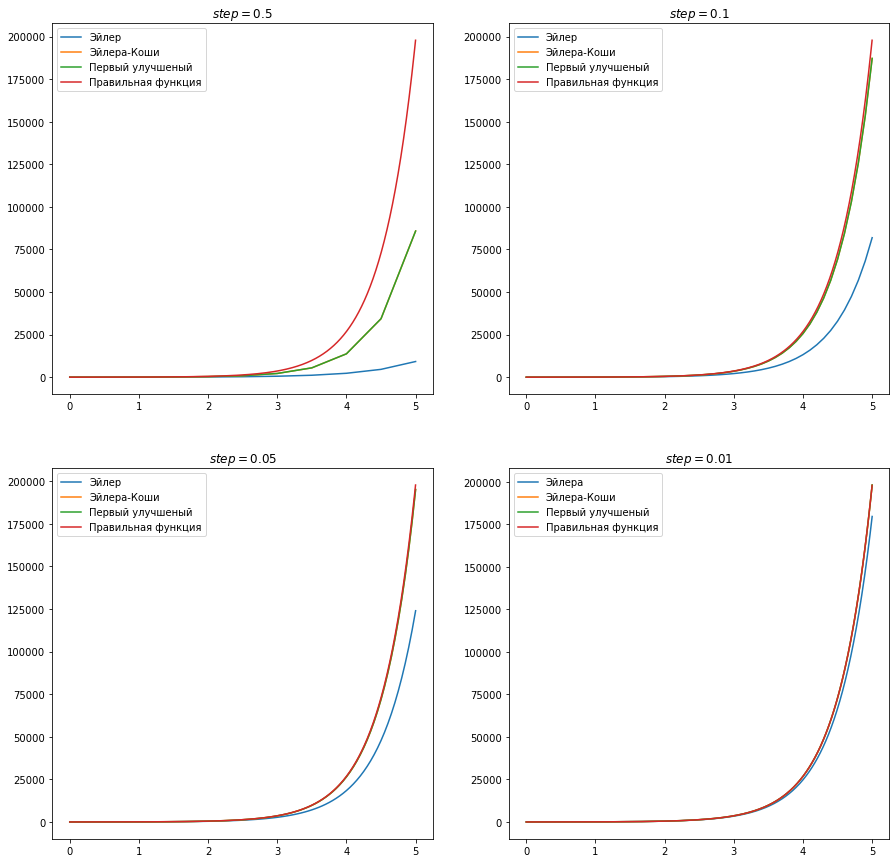

In [9]:
step = np.array([0.5, 0.1, 0.05, 0.01])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

idx = 0
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[0,0].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[0,0].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[0,0].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[0,0].plot(ansX, ansY, label = 'Правильная функция')
ax[0,0].set(title = r'$step=0.5$')
ax[0,0].legend()

idx = 1
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[0,1].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[0,1].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[0,1].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[0,1].plot(ansX, ansY, label = 'Правильная функция')
ax[0,1].set(title = r'$step=0.1$')
ax[0,1].legend()

idx = 2
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[1,0].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[1,0].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[1,0].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[1,0].plot(ansX, ansY, label = 'Правильная функция')
ax[1,0].set(title = r'$step=0.05$')
ax[1,0].legend()

idx = 3
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[1,1].plot(solve1[0], solve1[1], label = 'Эйлера')
ax[1,1].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[1,1].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[1,1].plot(ansX, ansY, label = 'Правильная функция')
ax[1,1].set(title = r'$step=0.01$')
ax[1,1].legend()


plt.show()

### Решить задачу Коши: 

$\frac{dy}{dx} = cos(x) + sin(y), \> y(0) = 1$

In [10]:
right = 30 # строим график на [x0...right]
start = (0, 1) # стартовая точка (y0, x0)
step = 0.5 # в теории обозначается h
cnt_step = int(right / step) 

In [11]:
f = lambda x, y=0 : cos(x) + sin(y)
# ans_f = lambda x, y=0 : 9 * exp(2 * x)

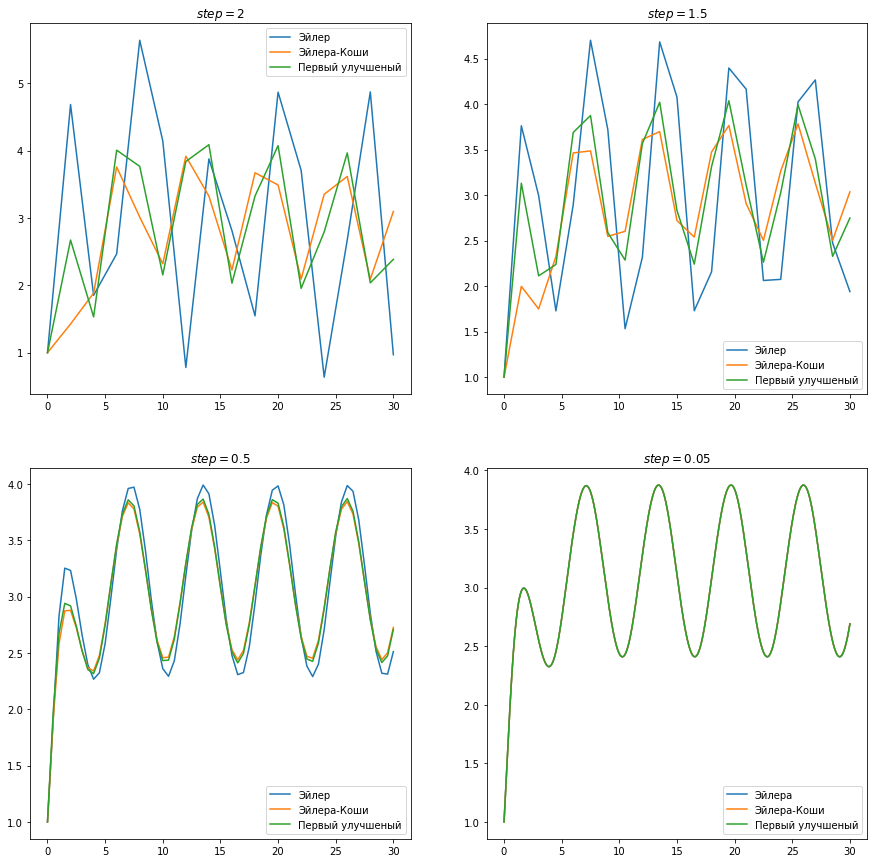

In [12]:
step = np.array([2, 1.5, 0.5, 0.005])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

idx = 0
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[0,0].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[0,0].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[0,0].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[0,0].set(title = r'$step=2$')
ax[0,0].legend()

idx = 1
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[0,1].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[0,1].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[0,1].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[0,1].set(title = r'$step=1.5$')
ax[0,1].legend()

idx = 2
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[1,0].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[1,0].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[1,0].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[1,0].set(title = r'$step=0.5$')
ax[1,0].legend()

idx = 3
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx])
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx])
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx])
ax[1,1].plot(solve1[0], solve1[1], label = 'Эйлера')
ax[1,1].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[1,1].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[1,1].set(title = r'$step=0.05$')
ax[1,1].legend()


plt.show()

### Решить задачу Коши: 

$\frac{dy}{dx} = 3y^{\frac{2}{3}}, \> y(2) = 0$

In [13]:
right = 30 # строим график на [x0...right]
start = (2, 0) # стартовая точка (y0, x0)
step = 0.5 # в теории обозначается h
cnt_step = int(right / step) 

In [14]:
f = lambda x, y=0 : 3 * y**(2/3)
ans_f = lambda x, y=0 : (x - 2)**3 # одно из решений

In [15]:
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step)
solve2 = modEuler(f, start[0], start[1], cnt_step, step)
solve3 = betterEuler(f, start[0], start[1], cnt_step, step)

In [16]:
ansX = np.arange(0, int(right), step)
ansY = [ans_f(x) for x in ansX]

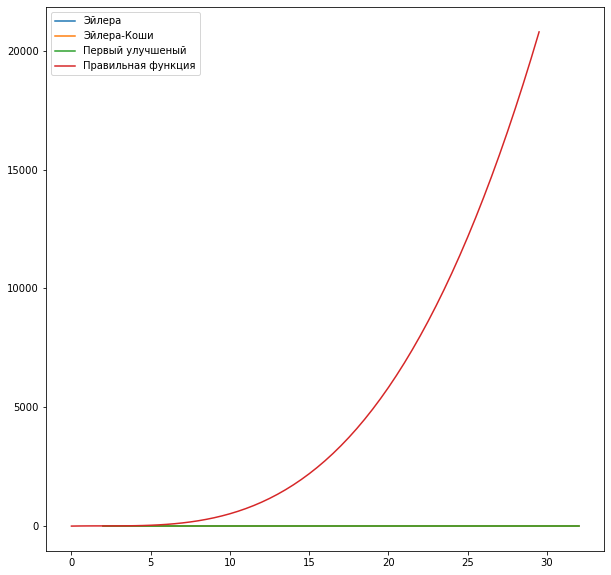

In [17]:
plt.figure(figsize=(10,10))
 
plt.plot(solve1[0], solve1[1], label = 'Эйлера')
plt.plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
plt.plot(solve3[0], solve3[1], label = 'Первый улучшеный')

plt.plot(ansX, ansY, label = 'Правильная функция')

plt.legend(loc="upper left")
plt.show()

Одно из решений данного уравнения: $y = (x - 2)^3$, однако метод Эйлера и его вариации не нашли его.

Решить задачу Коши: 

$\frac{dy}{dx} = -\frac{3}{cos(x)} + 2tg(x) \cdot y, \> y(0) = 1$

In [18]:
right = 9 # строим график на [x0...right]
start = (0, 1) #стартовая точка (y0, x0)
step = 0.05 # в теории обозначается h
cnt_step = int(right / step) 

In [19]:
f = lambda x, y=0 : -3/cos(x) + 2*tan(x)*y
ans_f = lambda x, y=0 : trasform(-3*sin(x)/cos(x)**2 + 1/cos(x)**2)

In [20]:
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step)
solve2 = modEuler(f, start[0], start[1], cnt_step, step)
solve3 = betterEuler(f, start[0], start[1], cnt_step, step)

In [21]:
ansX = np.arange(0, int(right), 0.001)
ansY = [ans_f(x) for x in ansX]

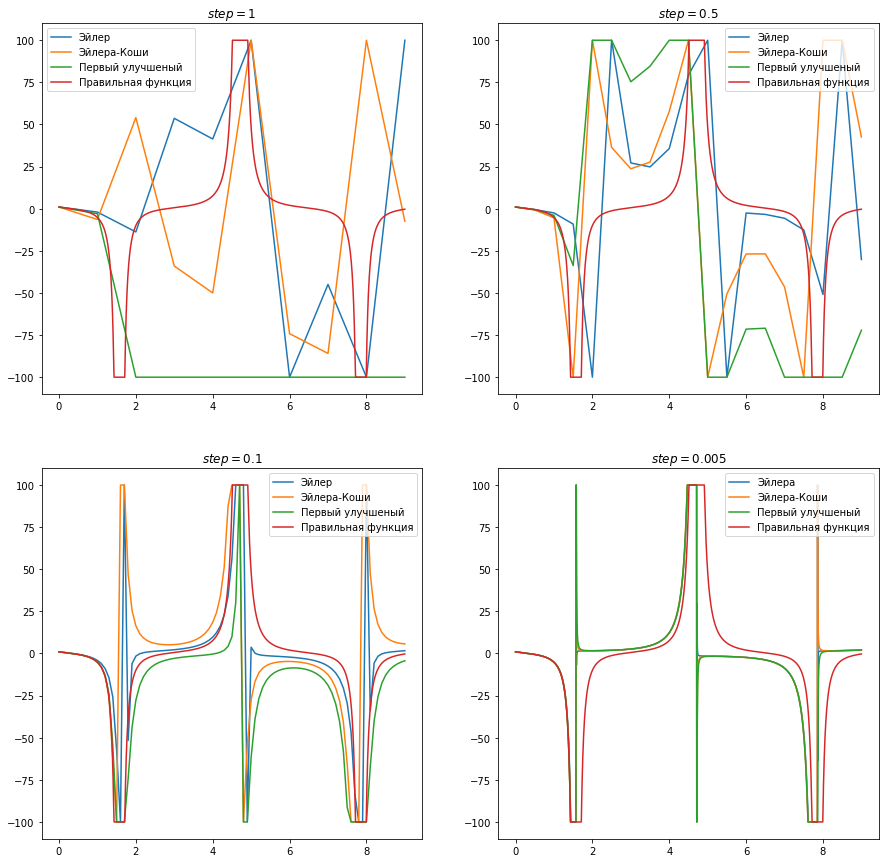

In [22]:
step = np.array([1, 0.5, 0.1, 0.005])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

idx = 0
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx], True)
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx], True)
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx], True)
ax[0,0].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[0,0].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[0,0].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[0,0].plot(ansX, ansY, label = 'Правильная функция')
ax[0,0].set(title = r'$step=1$')
ax[0,0].legend()

idx = 1
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx], True)
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx], True)
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx], True)
ax[0,1].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[0,1].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[0,1].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[0,1].plot(ansX, ansY, label = 'Правильная функция')
ax[0,1].set(title = r'$step=0.5$')
ax[0,1].legend()

idx = 2
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx], True)
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx], True)
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx], True)
ax[1,0].plot(solve1[0], solve1[1], label = 'Эйлер')
ax[1,0].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[1,0].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[1,0].plot(ansX, ansY, label = 'Правильная функция')
ax[1,0].set(title = r'$step=0.1$')
ax[1,0].legend()

idx = 3
cnt_step = int(right / step[idx]) 
solve1 = Euler_basic(f, start[0], start[1], cnt_step, step[idx], True)
solve2 = modEuler(f, start[0], start[1], cnt_step, step[idx], True)
solve3 = betterEuler(f, start[0], start[1], cnt_step, step[idx], True)
ax[1,1].plot(solve1[0], solve1[1], label = 'Эйлера')
ax[1,1].plot(solve2[0], solve2[1], label = 'Эйлера-Коши')
ax[1,1].plot(solve3[0], solve3[1], label = 'Первый улучшеный')
ax[1,1].plot(ansX, ansY, label = 'Правильная функция')
ax[1,1].set(title = r'$step=0.005$')
ax[1,1].legend()


plt.show()

## Недостатки

1) Невысокая точность

2) Могут потеряться решения

3) Применим только для решения задачи Коши

4) Вычислительная неустойчивость


# Исследование проблемы решения ОДУ

## I. Метод Эйлера для ОДУ первого порядка

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

с начальным значением $u(t=0) = u_0$.

Вот простая иллюстрация решения этого уравнения с явным методом Эйлера.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

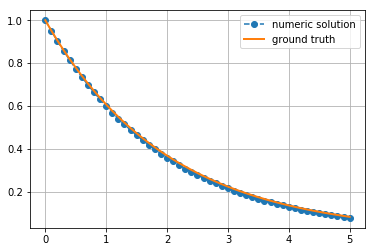

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Проверяем функцию выше для изменения размера шага $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$ 

$ \frac{u_{k+1} - u_{k}}{dt_{k}} = \lambda u_{k}   =>    u_{k+1} = (1 + dt\lambda) u_{k} $ - отсюда понятно, почему начинаются 'осцилляции' при больших шагах

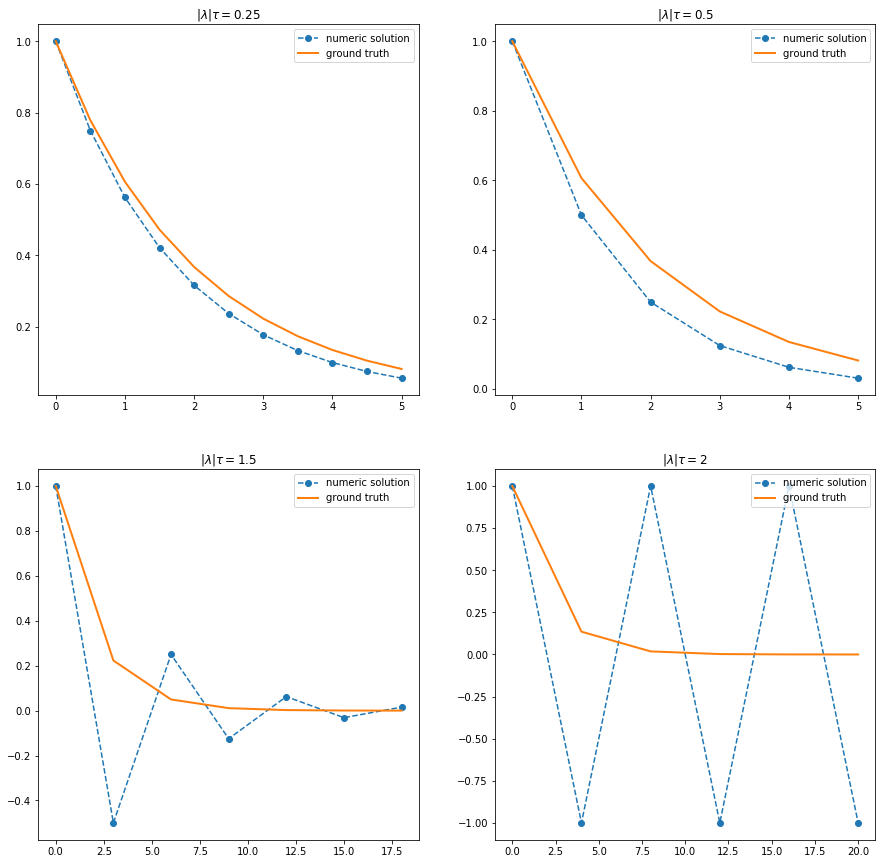

In [4]:
step = np.array([0.5, 1, 3, 4])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))

t1, u1 = euler_solve(lam, u0=1.0, T=5, dt=step[0])
t2, u2 = euler_solve(lam, u0=1.0, T=5, dt=step[1])            # считаем решения для разных значений шага
t3, u3 = euler_solve(lam, u0=1.0, T=20, dt=step[2])
t4, u4 = euler_solve(lam, u0=1.0, T=20, dt=step[3])

ax[0,0].plot(t1, u1, 'o--', label='numeric solution')
ax[0,0].plot(t1, np.exp(lam*t1), '-', lw=2, label='ground truth')
ax[0,0].set(title = r'$|\lambda| \tau = 0.25$')
ax[0,0].legend()

ax[0,1].plot(t2, u2, 'o--', label='numeric solution')
ax[0,1].plot(t2, np.exp(lam*t2), '-', lw=2, label='ground truth')    # строим для них графики
ax[0,1].set(title = r'$|\lambda| \tau = 0.5$')
ax[0,1].legend()

ax[1,0].plot(t3, u3, 'o--', label='numeric solution')
ax[1,0].plot(t3, np.exp(lam*t3), '-', lw=2, label='ground truth')
ax[1,0].set(title = r'$|\lambda| \tau = 1.5$')
ax[1,0].legend()

ax[1,1].plot(t4, u4, 'o--', label='numeric solution')
ax[1,1].plot(t4, np.exp(lam*t4), '-', lw=2, label='ground truth')
ax[1,1].set(title = r'$|\lambda| \tau = 2$')
ax[1,1].legend()


plt.show()

При $ 1 < |\lambda| \tau < 2 $, начинаются осцилляции вокруг нуля, но они еще стабильны; при $\geqslant 2$ решение уже не сойдется

### Test I.2

Реализуем функцию для решения того же уравнения, $ \frac{du}{dt} = \lambda u $, используя неявную схему Эйлера. Сравним поведение неявных и явных схем Эйлера.

$ \frac{u_{k+1} - u_{k}}{dt_{k}} = \lambda u_{k+1}  \Rightarrow   u_{k+1} (1 - dt \lambda) = u_{k}  $ - можно ожидать чего-то хорошего для любого ненулевого $dt$ при $\lambda < 0$, в отличии от explicit scheme

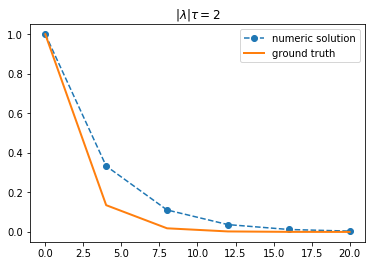

In [5]:
def Euler_implicit(lam, u0, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    u = np.zeros(t.shape[0])
    u[0] = u0
    for i in range(N):
        u[i + 1] = u[i] / (1 - lam * dt)  # по формуле перед кодом считаем каждое следующее значение
    
    return t, u

t5, u5 = Euler_implicit(lam, u0=1.0, T=20, dt=step[3]) #оставлю только |\lambda| \tau = 2, чтобы показать что такая схема стабильнее и не начинает прыгать
plt.plot(t5, u5, 'o--', label='numeric solution')
plt.plot(t5, np.exp(lam*t5), '-', lw=2, label='ground truth')
plt.title(r'$|\lambda| \tau = 2$')
plt.legend()
plt.show()

## II. Обобщение на систему и  жесткость системы

*Жёсткой системой обыкновенных дифференциальных уравнений (ОДУ) называется (нестрого говоря) такая система ОДУ, численное решение которой явными методами является неудовлетворительным из-за резкого увеличения числа вычислений (при малом шаге интегрирования) или из-за резкого возрастания погрешности (так называемого, взрыва погрешности) при недостаточно малом шаге.*

Рассмотрим систему из двух уравнений первого порядка

$$
\frac{d\mathbf{u}} {d t} = A\mathbf{u}
$$

где $ \mathbf{u} $ - двумерный вектор, а $ A $ - известная постоянная матрица 2 $ \times $ 2.

Реализуйте обобщение подпрограммы `euler_solve` для решения системы линейных уравнений первого порядка с не зависящей от времени матрицей $ A $, используя явный метод Эйлера.

$\mathbf{u} = (x, y)^T$

$\begin{cases}
\frac{x_{k+1} - x_{k}}{dt} = f(x_{k}, y_{k}) \\
\frac{y_{k+1} - y_{k}}{dt} = g(x_{k}, y_{k})
\end{cases}$

$\begin{cases}
x_{k+1} = x_{k} + dt \cdot f(x_{k}, y_{k}) \\
y_{k+1} = y_{k} + dt \cdot g(x_{k}, y_{k})
\end{cases}$

$ \Rightarrow \mathbf{u_{k+1}} = (1 + dt \cdot A) \mathbf{u_{k}} $

In [1]:
def Euler_biexplicit(u0, A, T, dt):
    N = int(T/dt)
    t = np.arange( N + 1 ) * dt # ось времени
    
    u = np.zeros((u0.shape[0], N+1))  # в принципе, код работает для любой размерности задачи
    u[:, 0] = u0
    
    for i in range(N):
        u[:, i+1] = u[:, i] + dt * A @ u[:, i]
    
    return t, u

### Test II.1

Берем
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

и начальное значение $\mathbf{u} = (1, 0)^T$.

Берем длину шага $\tau=0.01$. Проверим устойчивость метода Эйлера.



Рeшаем систему с шагом $\tau=0.01$.

Найдём собственные значения $A$ и на основе этого делаем вывод о жесткости

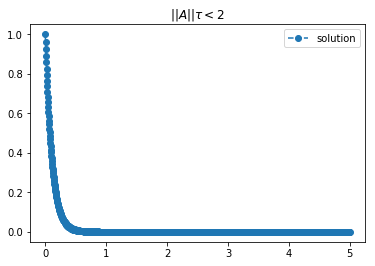

Собственные значения A:  [  -9.34647667 -499.65352333]
Норма матрицы A:  500.22494939776846
Самый большой шаг:  0.004002773735447413


In [24]:
u0 = np.array([1, 0])
A = np.array([[-10, 10], [32, -499]])

                                           # при шаге 0.01 метод не стабилен
t6, u6 = Euler_biexplicit(u0, A, 5, 4e-3)  # шаг 4e-3 лежит примерно равен 'критическому', при больших шагах все начинает расходиться;
                                           # как увидим из бОльшего собственного значения, шаг 0.01 слишком большой
plt.plot(t6, u6[0], 'o--', label='solution')
plt.title(r'$||A|| \tau < 2$')   #примерно
plt.legend()
plt.show()

print("Собственные значения A: ", np.linalg.eigvals(A))
print("Норма матрицы A: ", np.linalg.norm(A))
print("Самый большой шаг: ", 2/np.max(np.abs(np.linalg.eigvals(A))))

Аналогичные рассуждения, как для $ |\lambda| \tau $, но теперь для $ \|\mathbf{A}\| \cdot dt $, аналогичные промежутки сходимости/расходимости решения, но правильнее рассуждать в терминах собственных значений, и будет система в которой $dt < \frac{2}{\lambda} $, для каждого $\lambda$, то есть нужно просто выбрать большее из собственных значений и им ограничивать $dt$

Соответственно система жесткая, т.к. одна из $\lambda$ сильно больше другой(примерно в 50 раз), сильно ограничивает выбор шага

# Вывод
Метод Эйлера являлся исторически первым методом численного решения задачи Коши. Ввиду невысокой точности и вычислительной неустойчивости для практического нахождения решений задачи Коши метод Эйлера применяется редко. Однако в виду своей простоты метод Эйлера находит своё применение в теоретических исследованиях дифференциальных уравнений, задач вариационного исчисления и ряда других математических проблем.

*Выполнили ученики 187 группы: Юдин Виктор, Зюляев Илья, Медведев Антон*